In [1]:
# Import libraries

import numpy as np # Data Manipulation
import pandas as pd # Data Manipulation
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization

import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('HomeC.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503911 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

In [4]:
df.shape

(503911, 32)

In [5]:
df.head()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [6]:
df[df.isnull().any(axis=1)]

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
503910,\,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# remove row with NaN value
df = df.dropna(axis=0)

In [8]:
df.shape

(503910, 32)

In [9]:
df.columns

Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')

In [10]:
# Python string method replace() returns a copy of the string in which the occurrences of old have been replaced with new, optionally restricting the number of replacements to max.
df.columns = [col.replace(' [kW]', '') for col in df.columns]
df.columns

Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1',
       'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'],
      dtype='object')

In [13]:
# check min max avg info of df[gen]
df['gen'].describe()

count    503910.000000
mean          0.076229
std           0.128428
min           0.000000
25%           0.003367
50%           0.004283
75%           0.083917
max           0.613883
Name: gen, dtype: float64

In [14]:
# check min max avg info of df[use]
df['use'].describe()

count    503910.000000
mean          0.858962
std           1.058207
min           0.000000
25%           0.367667
50%           0.562333
75%           0.970250
max          14.714567
Name: use, dtype: float64

In [7]:
selected_columns = [
    'use',
    'gen',
    'temperature', 
    'apparentTemperature', 
    'summary', 
    'pressure', 
    'windSpeed', 
    'windBearing', 
    'visibility', 
    'cloudCover'
]

df = df[selected_columns]

In [8]:
df.columns

Index(['use', 'gen', 'temperature', 'apparentTemperature', 'summary',
       'pressure', 'windSpeed', 'windBearing', 'visibility', 'cloudCover'],
      dtype='object')

In [9]:
df.head()

,use,gen,temperature,apparentTemperature,summary,pressure,windSpeed,windBearing,visibility,cloudCover
0,0.932833,0.003483,36.14,29.26,Clear,1016.91,9.18,282.0,10.0,cloudCover
1,0.934333,0.003467,36.14,29.26,Clear,1016.91,9.18,282.0,10.0,cloudCover
2,0.931817,0.003467,36.14,29.26,Clear,1016.91,9.18,282.0,10.0,cloudCover
3,1.022050,0.003483,36.14,29.26,Clear,1016.91,9.18,282.0,10.0,cloudCover
4,1.139400,0.003467,36.14,29.26,Clear,1016.91,9.18,282.0,10.0,cloudCover


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503910 entries, 0 to 503909
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   use                  503910 non-null  float64
 1   gen                  503910 non-null  float64
 2   temperature          503910 non-null  float64
 3   apparentTemperature  503910 non-null  float64
 4   summary              503910 non-null  object 
 5   pressure             503910 non-null  float64
 6   windSpeed            503910 non-null  float64
 7   windBearing          503910 non-null  float64
 8   visibility           503910 non-null  float64
 9   cloudCover           503910 non-null  object 
dtypes: float64(8), object(2)
memory usage: 42.3+ MB


In [11]:
df['cloudCover'].unique()

array(['cloudCover', '0.75', '0', '1', '0.31', '0.44', '0.13', '0.19',
       '0.25', '0.16', '0.21', '0.15', '0.14', '0.27', '0.28', '0.17',
       '0.05', '0.1', '0.26', '0.29', '0.11', '0.09', '0.12', '0.06',
       '0.02', '0.08', '0.04', '0.35', '0.22', '0.23', '0.54', '0.39',
       '0.03', '0.07', '0.76', '0.62', '0.18', '0.79', '0.48', '0.24',
       '0.57', 0.24, 1.0, 0.31, 0.28, 0.15, 0.41, 0.1, 0.12, 0.08, 0.09,
       0.19, 0.04, 0.05, 0.29, 0.27, 0.35, 0.18, 0.06, 0.03, 0.11, 0.14,
       0.25, 0.78, 0.0, 0.16, 0.21, 0.23, 0.17, 0.75, 0.26, 0.2, 0.76,
       0.13, 0.77, 0.46, 0.07, 0.55, 0.02, 0.01, 0.51, 0.47, 0.5, 0.4,
       0.3, 0.22, 0.43, 0.33, 0.6, 0.68, 0.66, 0.45, 0.34, 0.52, 0.67,
       0.48, 0.49, 0.39, 0.37, 0.62, 0.36, 0.79, 0.61, 0.38, 0.42, 0.53,
       0.63, 0.44, 0.54, 0.32, 0.56, 0.58, 0.72, 0.57, 0.73, 0.71, 0.64,
       0.59], dtype=object)

In [12]:
df[df['cloudCover']=='cloudCover'].shape

(58, 10)

In [13]:
df['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
df['cloudCover'] = df['cloudCover'].astype('float')

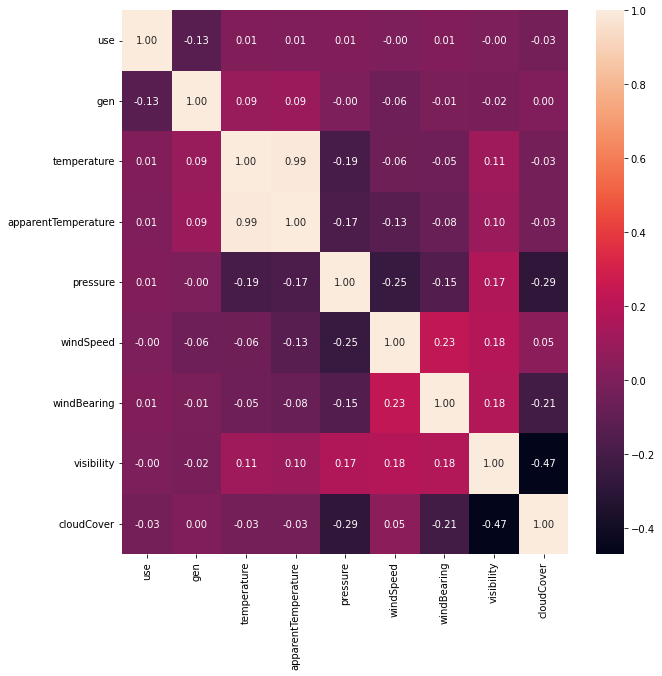

In [14]:
#heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', ax=ax)
plt.show()

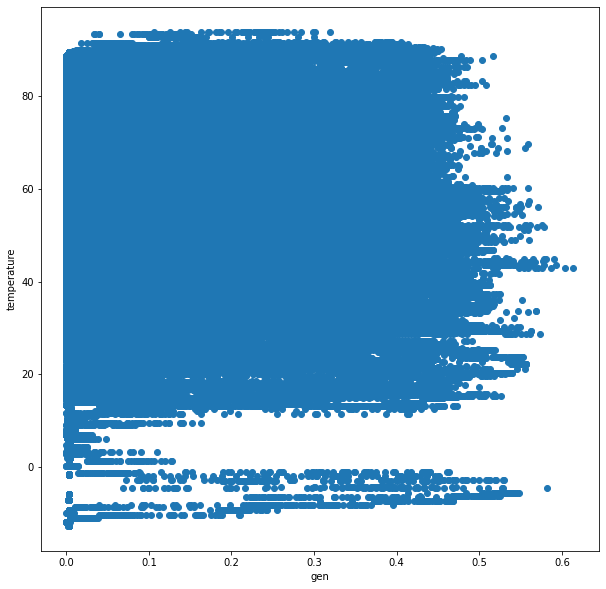

In [21]:
# create a plot of gen vs temperature
plt.figure(figsize=(10,10))
plt.scatter(df['gen'], df['temperature'])
plt.xlabel('gen')
plt.ylabel('temperature')
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503910 entries, 0 to 503909
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   use                  503910 non-null  float64
 1   gen                  503910 non-null  float64
 2   temperature          503910 non-null  float64
 3   apparentTemperature  503910 non-null  float64
 4   summary              503910 non-null  object 
 5   pressure             503910 non-null  float64
 6   windSpeed            503910 non-null  float64
 7   windBearing          503910 non-null  float64
 8   visibility           503910 non-null  float64
 9   cloudCover           503910 non-null  float64
dtypes: float64(9), object(1)
memory usage: 42.3+ MB


In [23]:
df['summary']

0              Clear
1              Clear
2              Clear
3              Clear
4              Clear
             ...    
503905    Light Rain
503906    Light Rain
503907    Light Rain
503908    Light Rain
503909    Light Rain
Name: summary, Length: 503910, dtype: object

In [15]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# encode summary column
df['summary'] = le.fit_transform(df['summary'])

In [16]:
#check the summary column
df['summary']

0          3
1          3
2          3
3          3
4          3
          ..
503905    10
503906    10
503907    10
503908    10
503909    10
Name: summary, Length: 503910, dtype: int32

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503910 entries, 0 to 503909
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   use                  503910 non-null  float64
 1   gen                  503910 non-null  float64
 2   temperature          503910 non-null  float64
 3   apparentTemperature  503910 non-null  float64
 4   summary              503910 non-null  int32  
 5   pressure             503910 non-null  float64
 6   windSpeed            503910 non-null  float64
 7   windBearing          503910 non-null  float64
 8   visibility           503910 non-null  float64
 9   cloudCover           503910 non-null  float64
dtypes: float64(9), int32(1)
memory usage: 40.4 MB


In [27]:
# Check outliers
df.describe()

,use,gen,temperature,apparentTemperature,summary,pressure,windSpeed,windBearing,visibility,cloudCover
count,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000
mean,0.858962,0.076229,50.741935,48.263382,5.201260,1016.301625,6.649936,202.356843,9.253444,0.225945
std,1.058207,0.128428,19.113807,22.027916,4.168663,7.895185,3.982716,106.520474,1.611186,0.289945
min,0.000000,0.000000,-12.640000,-32.080000,0.000000,986.400000,0.000000,0.000000,0.270000,0.000000
25%,0.367667,0.003367,35.770000,31.090000,3.000000,1011.290000,3.660000,148.000000,9.420000,0.040000
50%,0.562333,0.004283,50.320000,50.320000,3.000000,1016.530000,5.930000,208.000000,10.000000,0.120000
75%,0.970250,0.083917,66.260000,66.260000,3.000000,1021.480000,8.940000,295.000000,10.000000,0.290000
max,14.714567,0.613883,93.720000,101.120000,17.000000,1042.460000,22.910000,359.000000,10.000000,1.000000


In [18]:
# Import libraries for modelling
from sklearn.model_selection import train_test_split


In [19]:
# Separate features and target variable
X = df[['temperature', 'apparentTemperature', 'pressure', 'windSpeed', 'windBearing', 'visibility', 'cloudCover']]
y = df['gen']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [30]:
# Features importance ranking using Random Forest
from sklearn.ensemble import RandomForestRegressor as Rfr

# Instantiate model with 100 decision trees
rf = Rfr(n_estimators=100)

# Train the model
rf.fit(X_train, y_train)

# Get the importance of the resulting features
importances = rf.feature_importances_

# Sort features by their importance
indices = importances.argsort()[::-1]

# Print the importance ranking of the features
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))


Feature ranking:
1. pressure (0.230941)
2. windBearing (0.167403)
3. windSpeed (0.156748)
4. temperature (0.142732)
5. apparentTemperature (0.123476)
6. cloudCover (0.103189)
7. visibility (0.075510)


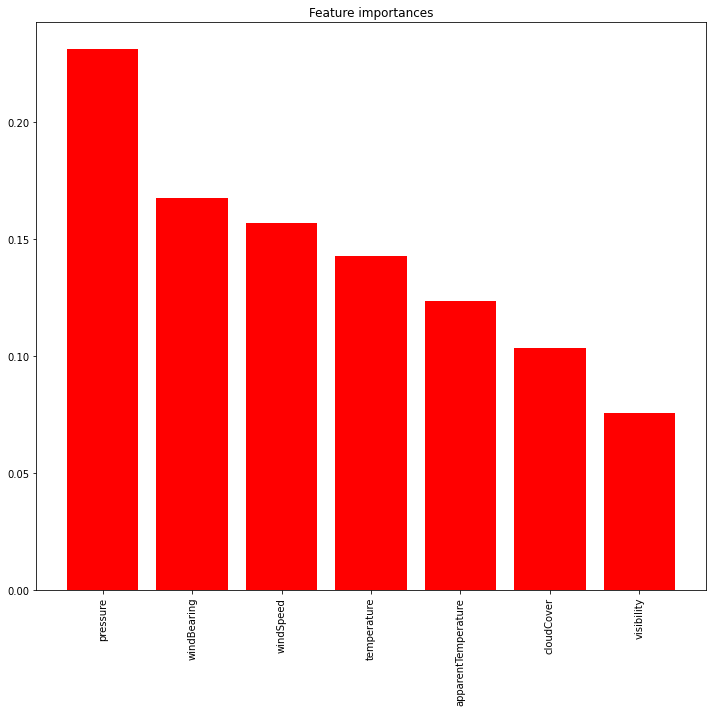

In [31]:
# Plot a graph for features importance
plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)

plt.tight_layout()
plt.show()

In [20]:
# Model Construction
# Train split remain same as features are all feasible
# Classifier, Random Forest, Logistic, SVM, Arima (Check later)

# X = df[['temperature', 'apparentTemperature', 'pressure', 'windSpeed', 'windBearing', 'visibility', 'cloudCover']]
# y = df['gen']

# Define models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as Rfr
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

models = [Rfr(n_estimators=10),
          Rfr(n_estimators=30),
          Rfr(n_estimators=50),
          DecisionTreeRegressor()]

In [21]:
# To check MSE, MAE, R2 and do model selection

best_mae = float('inf')
best_mse = float('inf')
best_r2 = float('-inf')

for model in models:
    model.fit(X_train, y_train)

    # Make prediction on mae, mse, and r2
    y_pred = model.predict(X_test)
    mae = np.mean(abs(y_pred - y_test))
    mse = np.mean((y_pred - y_test)**2)
    r2 = model.score(X_test, y_test)

    # Print model name and evaluation metrics
    print('\nModel name: {}'.format(model))
    print('---------------------')
    print('MAE: {}'.format(mae))
    print('MSE: {}'.format(mse))
    print('R2: {}'.format(r2))
    print('---------------------')


Model name: RandomForestRegressor(n_estimators=10)
---------------------
MAE: 0.014165849430630616
MSE: 0.0012006161102593787
R2: 0.9269484908295222
---------------------

Model name: RandomForestRegressor(n_estimators=30)
---------------------
MAE: 0.014165745723415028
MSE: 0.0011988377054399002
R2: 0.9270566979032645
---------------------

Model name: RandomForestRegressor(n_estimators=50)
---------------------
MAE: 0.014160604549062232
MSE: 0.0011996619272169398
R2: 0.9270065481141775
---------------------

Model name: DecisionTreeRegressor()
---------------------
MAE: 0.014162491176120371
MSE: 0.0011986909819694273
R2: 0.9270656252955068
---------------------


In [ ]:
from sklearn.model_selection import learning_curve

# Define the learning curve function
def plot_learning_curve(estimator, X, y, cv, train_sizes, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)
    
    # Calculate the mean and standard deviation of training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # Plot the learning curve
    plt.figure()
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation Score')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plt.title(title)
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


# Set the parameters for the learning curve
cv = 5
train_sizes = np.linspace(0.1, 1.0, 10)

# Train and plot the learning curve for the old model
old_model = Rfr(n_estimators = 10, criterion = 'squared_error', random_state = 1, n_jobs = -1)
plot_learning_curve(old_model, X, y, cv, train_sizes, 'Original Model')

In [37]:
# # Optimizing the model
# # Hyperparameter tuning
# # Grid Search
# from sklearn.model_selection import GridSearchCV

# # PolynomialFeature
# from sklearn.preprocessing import PolynomialFeatures

# # Polynomial Solution
# pol = PolynomialFeatures(degree=2)
# X_pol = pol.fit_transform(X)
# X_train, X_test, y_train, y_test = train_test_split(X_pol, y, test_size=0.2, random_state=0)

# new_model = Rfr(n_estimators = 50, criterion = 'squared_error', random_state = 1, n_jobs = -1)

# model.fit(X_train, y_train)

# # Make predictions and evalute on mse, mae and r2
# y_pred = model.predict(X_test)
# mae = np.mean(abs(y_pred - y_test))
# mse = np.mean((y_pred - y_test)**2)
# r2 = model.score(X_test, y_test)

# # Print model name and evaluation metrics
# print('\nModel name: {}'.format(model))
# print('---------------------')
# print('MAE: {}'.format(mae))
# print('MSE: {}'.format(mse))
# print('R2: {}'.format(r2))
# print('---------------------')


KeyboardInterrupt: 

In [39]:
model = Rfr(n_estimators = 10, criterion = 'squared_error', random_state = 1, n_jobs = -1)

model.fit(X_train, y_train)

# Make predictions and evalute on mse, mae and r2
y_pred = model.predict(X_test)
mae = np.mean(abs(y_pred - y_test))
mse = np.mean((y_pred - y_test)**2)
r2 = model.score(X_test, y_test)

# Print model name and evaluation metrics
print('\nModel name: {}'.format(model))
print('---------------------')
print('MAE: {}'.format(mae))
print('MSE: {}'.format(mse))
print('R2: {}'.format(r2))
print('---------------------')


Model name: RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)
---------------------
MAE: 0.014177202691482236
MSE: 0.0012023925322187346
R2: 0.9268404044029405
---------------------


In [40]:
## Comparing the actual output and the predicted output

ans = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
ans

,Actual,Predicted
391132,0.037933,0.029477
454552,0.006500,0.003851
241362,0.302250,0.300517
413167,0.004200,0.003974
58184,0.001633,0.003393
...,...,...
172994,0.003467,0.003464
363536,0.387233,0.384296
146417,0.032717,0.015327
218698,0.003150,0.003115


In [41]:
# model deploying
import pickle

# Save the model
with open('weather_v1.pkl', 'wb') as file:
    pickle.dump(model, file)

In [42]:
## Comparing the actual output and the predicted output with saved model

with open('weather_v1.pkl', 'rb') as file:
    model = pickle.load(file)

# fit the model


# Make predictions and evalute on mse, mae and r2
ans = pd.DataFrame({'Actual': y_test, 'Predicted': model.predict(X_test)})
ans


,Actual,Predicted
391132,0.037933,0.029477
454552,0.006500,0.003851
241362,0.302250,0.300517
413167,0.004200,0.003974
58184,0.001633,0.003393
...,...,...
172994,0.003467,0.003464
363536,0.387233,0.384296
146417,0.032717,0.015327
218698,0.003150,0.003115


In [43]:
# show summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503910 entries, 0 to 503909
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   use                  503910 non-null  float64
 1   gen                  503910 non-null  float64
 2   temperature          503910 non-null  float64
 3   apparentTemperature  503910 non-null  float64
 4   summary              503910 non-null  int32  
 5   pressure             503910 non-null  float64
 6   windSpeed            503910 non-null  float64
 7   windBearing          503910 non-null  float64
 8   visibility           503910 non-null  float64
 9   cloudCover           503910 non-null  float64
dtypes: float64(9), int32(1)
memory usage: 40.4 MB


In [30]:
df.head()

,use,gen,temperature,apparentTemperature,summary,pressure,windSpeed,windBearing,visibility,cloudCover
0,0.932833,0.003483,36.14,29.26,3,1016.91,9.18,282.0,10.0,0.75
1,0.934333,0.003467,36.14,29.26,3,1016.91,9.18,282.0,10.0,0.75
2,0.931817,0.003467,36.14,29.26,3,1016.91,9.18,282.0,10.0,0.75
3,1.022050,0.003483,36.14,29.26,3,1016.91,9.18,282.0,10.0,0.75
4,1.139400,0.003467,36.14,29.26,3,1016.91,9.18,282.0,10.0,0.75


In [45]:
# Test the saved model

# ask for input
temperature = float(input('Enter temperature: '))
apparentTemperature = float(input('Enter apparentTemperature: '))
pressure = float(input('Enter pressure: '))
windSpeed = float(input('Enter windSpeed: '))
windBearing = float(input('Enter windBearing: '))
visibility = float(input('Enter visibility: '))
cloudCover = float(input('Enter cloudCover: '))

user_input = [[temperature, apparentTemperature, pressure, windSpeed, windBearing, visibility, cloudCover]]

# predict
user_prediction = loaded_model.predict(user_input)

# show prediction
print('Predicted gen:', user_prediction)

Predicted gen: [0.00330899]
